# I. Import necessary libraries

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV #for cross validation

#models used
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
#neural network
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('./diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(70692, 18)

# II. Examine Data set



In [4]:
df.shape

(70692, 18)

In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#check and if missing values need to clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
#break down column info
info = ["13-level age category (AGE 5YR intervals) 1 = 18-24 9 = 60-64 13 = 80 or older",
        "1: male, 0: female",
        "0 = no high cholesterol 1 = high cholesterol",
        "0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years",
        "Body Mass Index",
        "Smoked at least 100 cigarettes in entire life? 0 = no 1 = yes",
        "coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes",
        "physical activity in past 30 days - not including job 0 = no 1 = yes",
        "Consume Fruit 1 or more times per day 0 = no 1 = yes",
        "Consume Vegetables 1 or more times per day 0 = no 1 = yes",
        "(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes",
        "persnal health health rating: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor",
        "days of poor mental health scale 1-30 days",
        "physical illness or injury days in past 30 days scale 1-30",
        "Serious difficulty walking or climbing stairs? 0 = no 1 = yes",
        "you ever had a stroke. 0 = no, 1 = yes",
        "0 = no high, BP 1 = high BP",
        "0 = no diabetes, 1 = diabetes"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Age:			13-level age category (AGE 5YR intervals) 1 = 18-24 9 = 60-64 13 = 80 or older
Sex:			1: male, 0: female
HighChol:			0 = no high cholesterol 1 = high cholesterol
CholCheck:			0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
BMI:			Body Mass Index
Smoker:			Smoked at least 100 cigarettes in entire life? 0 = no 1 = yes
HeartDiseaseorAttack:			coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity:			physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits:			Consume Fruit 1 or more times per day 0 = no 1 = yes
Veggies:			Consume Vegetables 1 or more times per day 0 = no 1 = yes
HvyAlcoholConsump:			(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
GenHlth:			persnal health health rating: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
MentHlth:			days of poor mental health scale 1-30 days
PhysHlth:			physical illness or injury days in past 30 days scale 1-30

codebook for age breakdwn: https://www.cdc.gov/brfss/annual_data/annual_2015.html

In [7]:
#examine target column
df["Diabetes"].unique()

array([0., 1.])

0 and 1 indicates classification where 1 = diabetes, 0 = healthy

Check correlations between column and target

In [8]:
print(df.corr()["Diabetes"].abs().sort_values(ascending=False))

Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
MentHlth                0.087029
Smoker                  0.085999
Veggies                 0.079293
Fruits                  0.054077
Sex                     0.044413
Name: Diabetes, dtype: float64


We can see the weakest correlatins with: sex, fruits, veggies, smoker, mental health, and heavy alcohol consumption

# III. Exploratory Data Analysis



Analyze Diabetes column

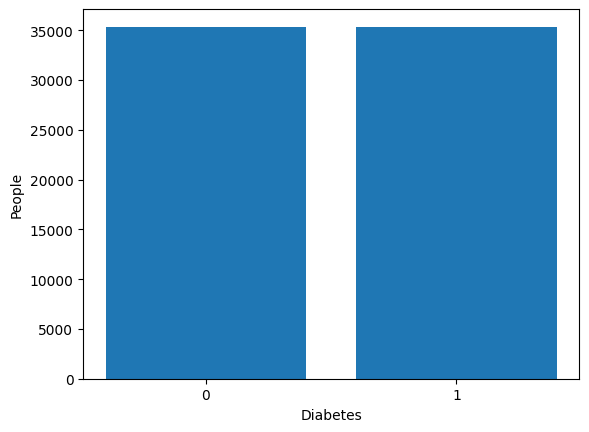

pecent of patients with heart issues:  50.0
pecent of patients without heart issues:  50.0


In [9]:
total = len(df)
disease = len(df[df['Diabetes'] == 1])
healthy = len(df[df['Diabetes'] == 0])

plt.bar(['0','1'],[healthy, disease])
plt.xlabel('Diabetes')
plt.ylabel('People')
plt.show()

disease = round((disease/total)*100, 2)
healthy = round((healthy/total)*100, 2)
print('pecent of patients with heart issues: ', disease)
print('pecent of patients without heart issues: ', healthy)

1. Sex

In [10]:
num_male = len(df[(df['Sex']==1)])
num_female = len(df[(df['Sex']==0)])
print(num_male, num_female)

32306 38386


In [11]:
#fairly even amount of data

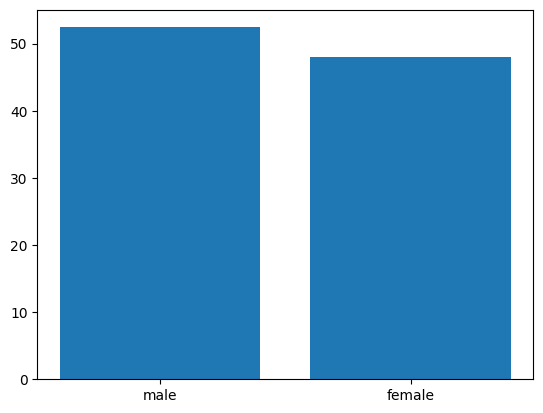

percent of males with diabetes: 52.42
percent of females with diabetes: 47.96


In [13]:
male_dis = len(df[(df['Sex']==1) & (df['Diabetes']== 1)]) / len(df[df['Sex'] == 1]) * 100
female_dis = len(df[(df['Sex']==0) & (df['Diabetes']== 1)]) / len(df[df['Sex']==0]) * 100

plt.bar(['male', 'female'], [male_dis, female_dis])
plt.show()
print('percent of males with diabetes:', round(male_dis,2))
print('percent of females with diabetes:', round(female_dis,2))

In [12]:
# we see that males are slightly more likely to have diabetes
# but the percentaages are fairly similar

2. Gen Health (1-5)

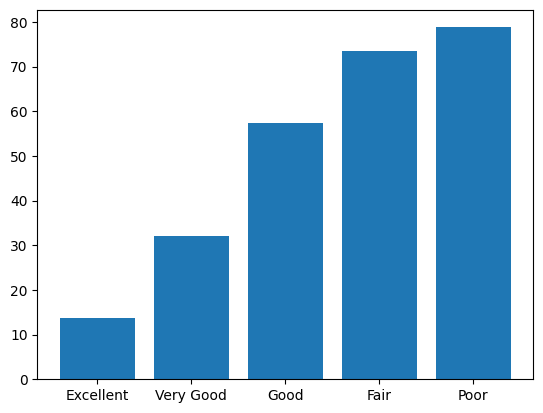

pecent of people who reported level Excellent general health: 13.76
pecent of people who reported level Very Good general health: 32.11
pecent of people who reported level Good general health: 57.44
pecent of people who reported level Fair general health: 73.59
pecent of people who reported level Poor general health: 78.82


In [14]:
GenHlth = [0,0,0,0,0]
GenHlth_categories = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
for i in range(5):
  GenHlth[i] = len(df[(df['GenHlth'] == i+1) & (df['Diabetes'] == 1)]) / len(df[df['GenHlth']==i+1]) * 100


plt.bar(GenHlth_categories, GenHlth)
plt.show()

for i in range(5):
  print(f"pecent of people who reported level {GenHlth_categories[i]} general health: {round(GenHlth[i],2)}")


In [15]:
# we see a general trend of those with higher general health scores
# had much higher rates of diabetes seen

3. High Blood Pressure

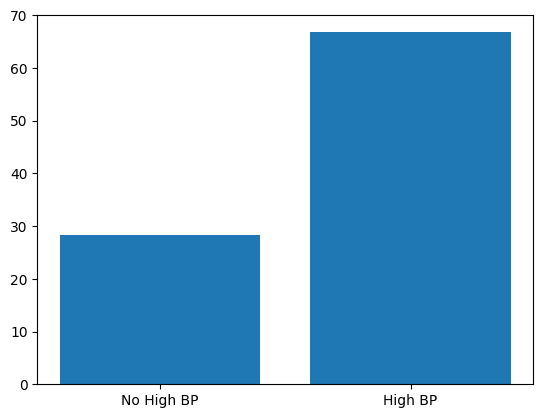

pecent of people who had No High BP with diabetes: 28.33
pecent of people who had High BP with diabetes: 66.79


In [16]:
HighBP = [0,0]
HighBP_categories = ['No High BP', 'High BP']

for i in range(2):
  HighBP[i] = len(df[(df['HighBP']== i) & (df['Diabetes']) == 1]) / len(df[df['HighBP'] == i]) * 100

plt.bar(HighBP_categories, HighBP)
plt.show()

for i in range(2):
  print(f"pecent of people who had {HighBP_categories[i]} with diabetes: {round(HighBP[i],2)}")



In [17]:
# we see that those with high cholesterol generally also had higher
# rates of diabetes

4. Body Mass Index

In [18]:
df['BMI'].describe()

,BMI
count,70692.000000
mean,29.856985
std,7.113954
min,12.000000
25%,25.000000
50%,29.000000
75%,33.000000
max,98.000000


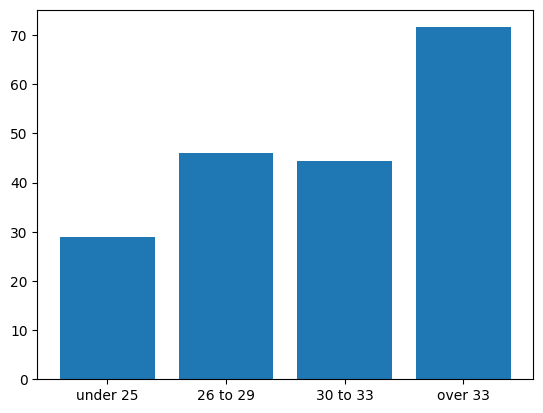

pecent of people who have BMI under 25: 28.98%
pecent of people who have BMI 26 to 29: 45.97%
pecent of people who have BMI 30 to 33: 44.47%
pecent of people who have BMI over 33: 71.6%


In [19]:
BMI = [0,1,2,3]
BMI_quart = ['under 25', '26 to 29', '30 to 33', 'over 33']

#split BMI into qurtiles
BMI[0] = len(df[(df['BMI'] <= 25) & (df['Diabetes']) == 1]) / len(df[df['BMI'] <= 25]) * 100
BMI[1] = len(df[(df['BMI'] > 25)& (df['BMI'] <=29 ) & (df['Diabetes']) == 1]) / len(df[(df['BMI'] > 25)& (df['BMI'] <=29 )]) * 100
BMI[2] = len(df[(df['BMI'] > 29)& (df['BMI'] <33 ) & (df['Diabetes']) == 1]) / len(df[(df['BMI'] > 29)& (df['BMI'] <=33 )]) * 100
BMI[3] = len(df[(df['BMI'] > 33) & (df['Diabetes']) == 1]) / len(df[df['BMI'] > 33]) * 100



plt.bar(BMI_quart, BMI)
plt.show()

for i in range(4):
  print(f"pecent of people who have BMI {BMI_quart[i]}: {round(BMI[i],2)}%")



In [20]:
# we see a general increase in diabetes as BMI increases with the two middle
# quaartiles having comparable rates of diabetes

5. High Cholesterol

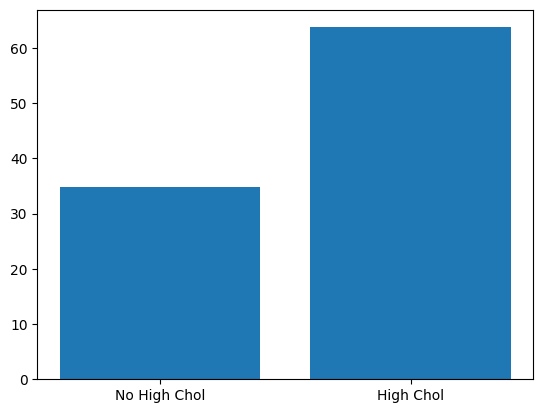

pecent of people who had No High Chol and diabetes: 34.78%
pecent of people who had High Chol and diabetes: 63.74%


In [21]:
HighChol = [0,1]
HighChol_categories = ['No High Chol', 'High Chol']

for i in range(2):
  HighChol[i] = len(df[(df['HighChol']== i) & (df['Diabetes']) == 1]) / len(df[df['HighChol'] == i]) * 100

plt.bar(HighChol_categories, HighChol)
plt.show()

for i in range(2):
  print(f"pecent of people who had {HighChol_categories[i]} and diabetes: {round(HighChol[i],2)}%")

In [22]:
# those with higher chol had significantly higher rates of diabetes

6. Age

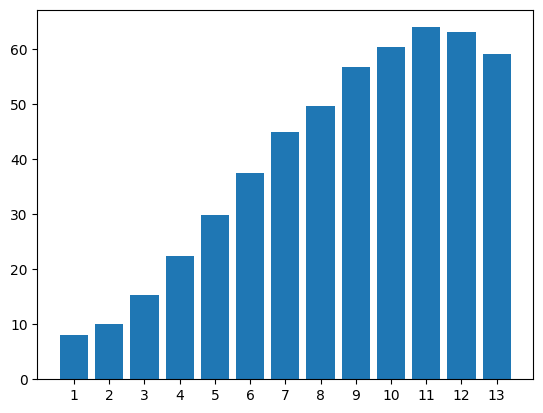

pecent of people in the age classifcation of 1 with diabetes: 7.97%
pecent of people in the age classifcation of 2 with diabetes: 10.03%
pecent of people in the age classifcation of 3 with diabetes: 15.32%
pecent of people in the age classifcation of 4 with diabetes: 22.41%
pecent of people in the age classifcation of 5 with diabetes: 29.86%
pecent of people in the age classifcation of 6 with diabetes: 37.48%
pecent of people in the age classifcation of 7 with diabetes: 44.94%
pecent of people in the age classifcation of 8 with diabetes: 49.55%
pecent of people in the age classifcation of 9 with diabetes: 56.7%
pecent of people in the age classifcation of 10 with diabetes: 60.41%
pecent of people in the age classifcation of 11 with diabetes: 63.91%
pecent of people in the age classifcation of 12 with diabetes: 63.09%
pecent of people in the age classifcation of 13 with diabetes: 59.14%


In [23]:
Age = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Age_class = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
for i in range(13):
  Age[i] = len(df[(df['Age']== i+1) & (df['Diabetes']) == 1]) / len(df[df['Age'] == i+1]) * 100

plt.bar(Age_class, Age)
plt.show()

for i in range(13):
  print(f"pecent of people in the age classifcation of {i+1} with diabetes: {round(Age[i],2)}%")


In [24]:
# general increase in diabetes rates as age range increase
# then decrease again after age class 11

7. Physical Activity


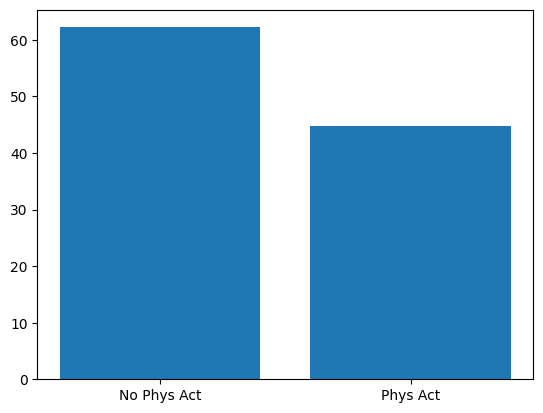

pecent of people who had No Phys Act and diabetes: 62.21%
pecent of people who had Phys Act and diabetes: 44.84%


In [25]:

PhysAct = [0,1]
PhysAct_categories = ['No Phys Act', 'Phys Act']

for i in range(2):
  PhysAct[i] = len(df[(df['PhysActivity']== i) & (df['Diabetes']) == 1]) / len(df[df['PhysActivity'] == i]) * 100

plt.bar(PhysAct_categories, PhysAct)
plt.show()

for i in range(2):
  print(f"pecent of people who had {PhysAct_categories[i]} and diabetes: {round(PhysAct[i],2)}%")



In [26]:
#we see higher rates in those who didn't perform any physical activity in the past 30 days

8. Heart Disease or Attack

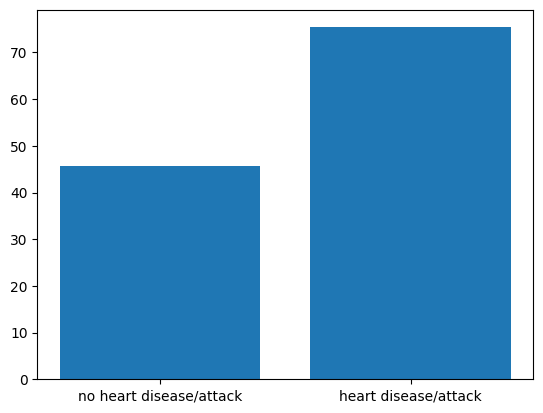

pecent of people who had no heart disease/attack and diabetes: 45.6%
pecent of people who had heart disease/attack and diabetes: 75.39%


In [27]:
#HeartDiseaseorAttack

HDA = [0,1]
HDA_cat = ['no heart disease/attack', 'heart disease/attack']

for i in range(2):
  HDA[i] = len(df[(df['HeartDiseaseorAttack']== i) & (df['Diabetes']) == 1]) / len(df[df['HeartDiseaseorAttack'] == i]) * 100

plt.bar(HDA_cat, HDA)
plt.show()

for i in range(2):
  print(f"pecent of people who had {HDA_cat[i]} and diabetes: {round(HDA[i],2)}%")

In [28]:
# no heart disease/attack had lower rates of diabetes
# curious if people had diabetes that contributed to heart problems or vice versa

Text(0.5, 1.0, 'Diabetes rates by heart disease/attack')

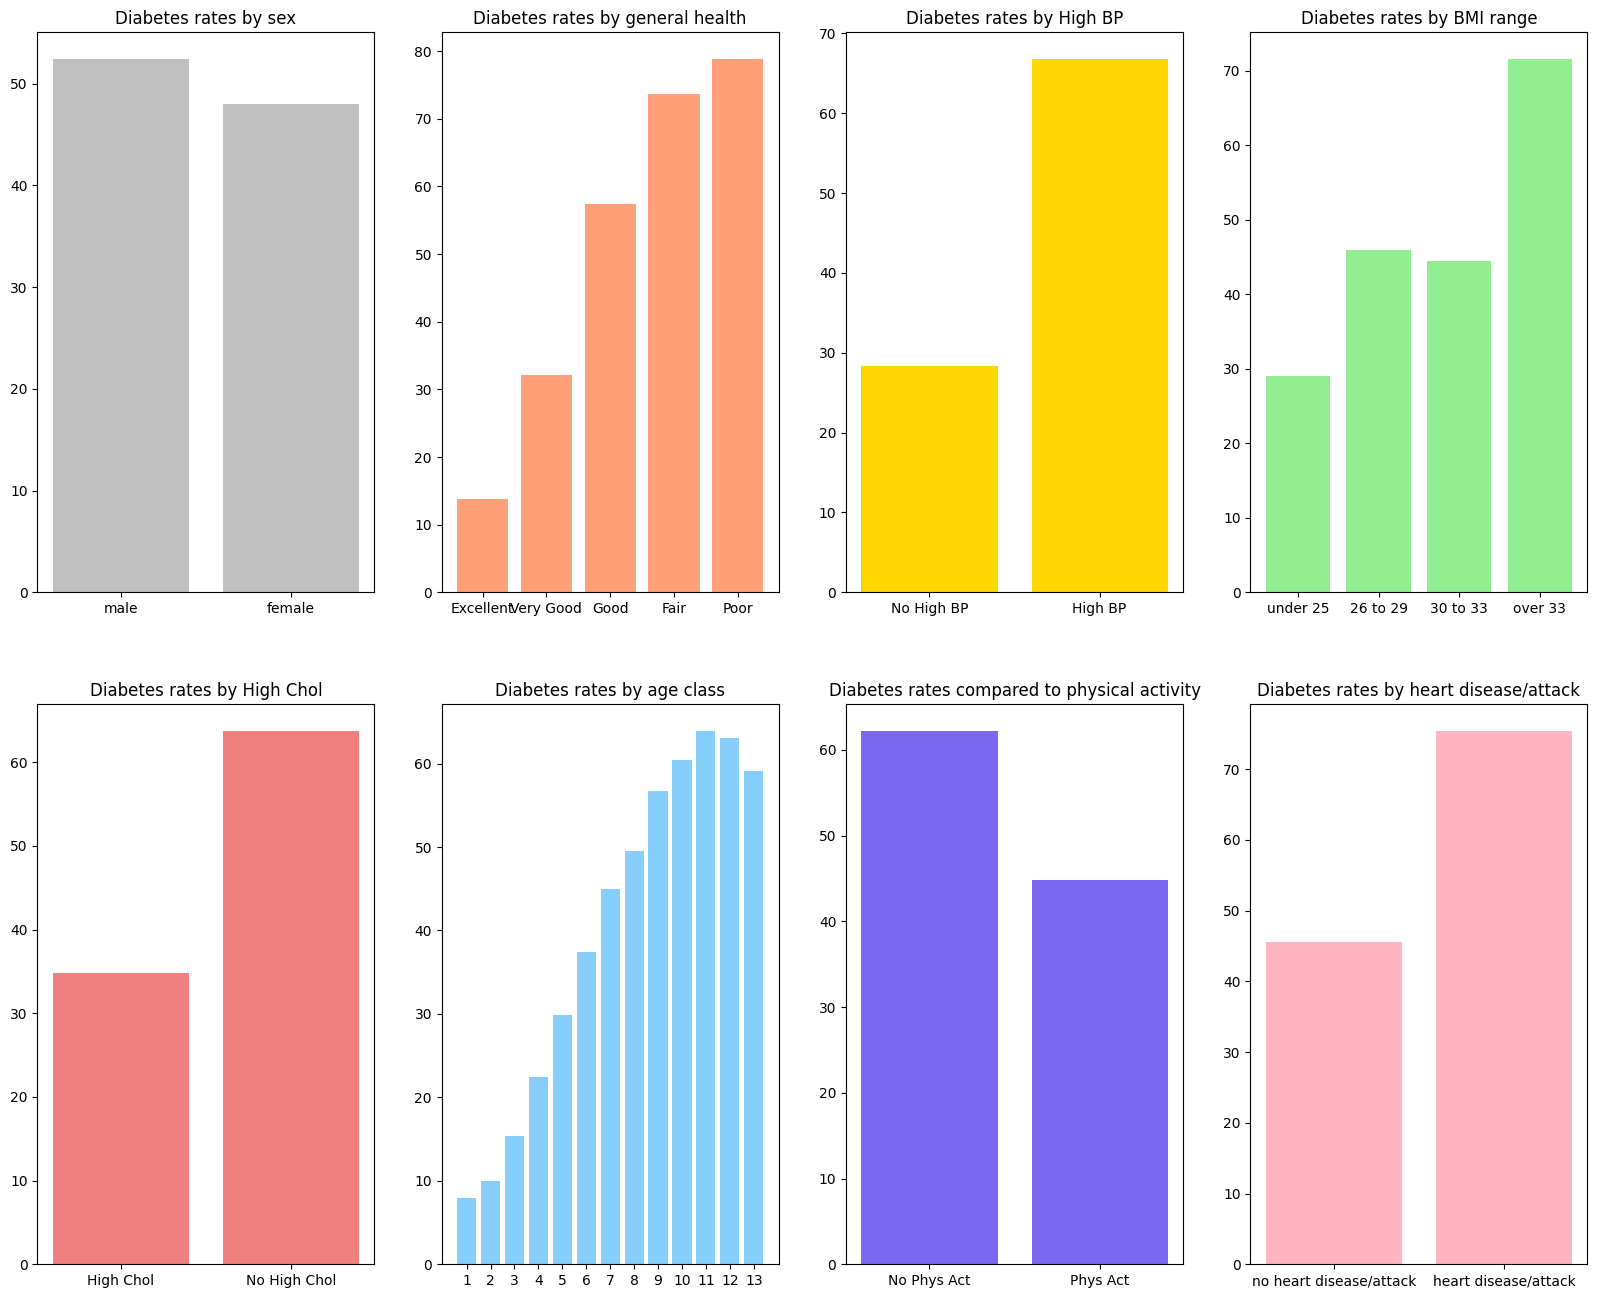

In [29]:
# Compiling the various graphs
fig, axes = plt.subplots(2, 4, figsize=(20, 16))
axes = axes.flatten()

axes[0].bar(['male', 'female'],[male_dis, female_dis], color='silver')
axes[0].set_title('Diabetes rates by sex')

axes[1].bar(GenHlth_categories, GenHlth, color='lightsalmon')
axes[1].set_title('Diabetes rates by general health')

axes[2].bar(HighBP_categories, HighBP, color='gold')
axes[2].set_title('Diabetes rates by High BP')

axes[3].bar(BMI_quart, BMI, color='lightgreen')
axes[3].set_title('Diabetes rates by BMI range')

axes[4].bar(['High Chol', 'No High Chol'], HighChol, color='lightcoral')
axes[4].set_title('Diabetes rates by High Chol')

axes[5].bar(Age_class, Age, color='lightskyblue')
axes[5].set_title('Diabetes rates by age class')

axes[6].bar(PhysAct_categories, PhysAct, color='mediumslateblue')
axes[6].set_title('Diabetes rates compared to physical activity')

axes[7].bar(HDA_cat, HDA, color='lightpink')
axes[7].set_title('Diabetes rates by heart disease/attack')

# IV Train-Test Split

In [30]:
features = df.drop("Diabetes",axis=1)
target = df["Diabetes"]

In [31]:
# split the data into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.30,random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(49484, 17)
(21208, 17)
(49484,)
(21208,)


# V. Model Fitting

1. Logistic Regression

In [33]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

lr_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#calculate and compare score
lr_acc = round(accuracy_score(lr_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Logistic Regression is: {lr_acc} %")

The accuracy score achieved using Logistic Regression is: 74.54 %


2. KNN

In [35]:
# we must determine the amount of neigbors to use
param_grid = {
        'n_neighbors': list(range(1, 16)),  # Explore k from 1 to 15
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()

#using 5 fold cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [41]:
#fit data
# attempted too use full 17 features but fitting took over 13 min with no results
# so going to test with reduced features
# included: GenHlt, HighBP, BMI, HighChol, Age, DiffWalk, PhysHlth, HeartDiseaseorAttack
#       PhysActivity, Stroke, CholCheck
knn_X_train = X_train[['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age',
                       'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Stroke', 'CholCheck']]
knn_X_test = X_test[['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age',
                       'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Stroke', 'CholCheck']]

grid_search.fit(knn_X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [42]:
# retrieve models
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation accuracy: 0.7318


In [43]:
#predict and score
knn_Y_pred=best_knn_model.predict(knn_X_test)

knn_acc = round(accuracy_score(knn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using KNN is: {knn_acc} %")

The accuracy score achieved using KNN is: 72.91 %


In [44]:
# we see similar accuracy as logistic regression

3. XGBoost

In [45]:
# doesn't need normalization, random state is set so results are consistent
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_Y_pred = xgb_model.predict(X_test)

In [46]:
xgb_acc = round(accuracy_score(xgb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using XGBoost is: {xgb_acc} %")

The accuracy score achieved using XGBoost is: 74.94 %


In [47]:
# still around. 75% acc for these first few models

4. Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_Y_pred = dt.predict(X_test)

In [49]:
dt_acc = round(accuracy_score(dt_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Decision Tree is: {dt_acc} %")

The accuracy score achieved using Decision Tree is: 65.94 %


In [51]:
# We see much lower accuracy than the other models, could try to tune hyperparameters
# with gridsearch again to see if better results can be found

5. Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_Y_pred = rf.predict(X_test)

In [53]:
rf_acc = round(accuracy_score(rf_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Random Forest is: {rf_acc} %")

The accuracy score achieved using Random Forest is: 72.85 %


In [54]:
# We see higher acc than jus a single decision tree but results that are still
# only on par with the other models

6. SVM

In [55]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
svm_Y_pred = sv.predict(X_test)

In [56]:
svm_acc = round(accuracy_score(svm_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Linear SVM is: {svm_acc} %")

The accuracy score achieved using Linear SVM is: 75.05 %


In [57]:
# similar to other models once again but significantly
# longer time to fit model

7. Naive Bayes

In [58]:
# probability based so no normalization needed
nb = GaussianNB()
nb.fit(X_train,Y_train)

nb_Y_pred = nb.predict(X_test)

In [59]:
nb_acc = round(accuracy_score(nb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Naive Bayes is: {nb_acc} %")

The accuracy score achieved using Naive Bayes is: 72.64 %


8. Stack (meta: xgboost, ensemble: KNN, RF, LR)

In [60]:
#chose arbitrarily but tried too make base models diverse and have xgboost as final decision maker

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('LR', LogisticRegression())
]

# Define meta-model
meta_model = xgb.XGBClassifier()

In [112]:
# Create and fit the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('LR', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,...
                                                 feature_weights=None,
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [113]:
stack_Y_pred = stacking_clf.predict(X_test)
stack_acc = round(accuracy_score(stack_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using the Stack Ensemble is: {stack_acc} %")

The accuracy score achieved using the Stack Ensemble is: 73.93 %


In [114]:
# we see that the stack performed similarly to other models

9. Neural Network

In [88]:
model = Sequential()
model.add(Dense(15,activation='relu',input_dim=17))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
X_train.shape

(49484, 17)

In [99]:
model.fit(X_train,Y_train,epochs=300, batch_size=64)

Epoch 1/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5471 - loss: 28.6570
Epoch 2/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5950 - loss: 0.7396
Epoch 3/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6076 - loss: 0.6850
Epoch 4/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6223 - loss: 0.6641
Epoch 5/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6447 - loss: 0.6501
Epoch 6/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6608 - loss: 0.6325
Epoch 7/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6772 - loss: 0.6163
Epoch 8/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7004 - loss: 0.5940
Epoch 9/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7134 - loss: 0.5723
Epoch 10/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7240 - loss: 0.5522
Epoch 11/300
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7290 - loss: 0.5431
Epoch 12/300
774/774 ━━━━━━━━━━━━━━━━━━━

In [100]:
nn_Y_pred = model.predict(X_test)

663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [101]:
rounded = [round(x[0]) for x in nn_Y_pred]
nn_Y_pred = rounded

In [102]:
nn_acc = round(accuracy_score(nn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Neural Network is: {nn_acc} %")

The accuracy score achieved using Neural Network is: 75.54 %


In [103]:
# Slightly higher prediction rate than the other models

#VI. Results

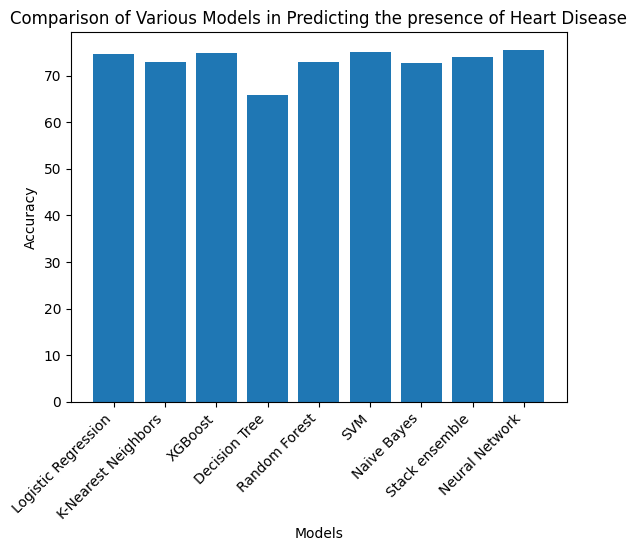

The accuracy score achieved using Logistic Regression is: 74.54 %
The accuracy score achieved using K-Nearest Neighbors is: 72.91 %
The accuracy score achieved using XGBoost is: 74.94 %
The accuracy score achieved using Decision Tree is: 65.94 %
The accuracy score achieved using Random Forest is: 72.85 %
The accuracy score achieved using SVM is: 75.05 %
The accuracy score achieved using Naive Bayes is: 72.64 %
The accuracy score achieved using Stack ensemble is: 73.93 %
The accuracy score achieved using Neural Network is: 75.54 %


In [118]:
#for display purposes
model = ['Logistic Regression', 'K-Nearest Neighbors', 'XGBoost', 'Decision Tree',
         'Random Forest', 'SVM', 'Naive Bayes', 'Stack ensemble', 'Neural Network']
accs = [lr_acc, knn_acc, xgb_acc, dt_acc, rf_acc, svm_acc, nb_acc, stack_acc, nn_acc]

#display bar graph
plt.bar(model, accs)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Comparison of Various Models in Predicting the presence of Heart Disease')
plt.show()

#outputting actual accuracies below graph
for i in range(len(model)):
    print(f"The accuracy score achieved using {model[i]} is: {accs[i]} %")

We see fairly similar results so might want to do more testing before choosing models.

# XII. Saving models for external use

experimenting with models to improve the prediction rate

In [36]:
#creating scaled data in case we want to test effects of scaling data on prediction rate
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
lr_2 = LogisticRegression()

lr_2.fit(X_train_scaled,Y_train)

lr_2_pred = lr_2.predict(X_test_scaled)

In [41]:
lr_2_acc = round(accuracy_score(lr_2_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Logistic Regression is: {lr_2_acc} %")

The accuracy score achieved using Logistic Regression is: 74.86 %


In [ ]:
#try to beat 74.54 unscaled, 74.86 scaled

In [44]:
param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear','lbfgs', 'saga']
}
log_reg = LogisticRegression(random_state=42) # Initialize Logistic Regression
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

In [46]:
   grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [47]:
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


In [48]:
best_model_pred = best_model.predict(X_test_scaled)
best_model_acc = round(accuracy_score(best_model_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Logistic Regression is: {best_model_acc} %")

The accuracy score achieved using Logistic Regression is: 74.83 %


In [ ]:
#choosing which model to use to predict chances of having heart disease based on patiient data
import pickle
# Assuming 'model' is your trained ML model
with open('diabetes_model.pkl', 'wb') as f:
  pickle.dump(xgb_model, f)